## # Data Science Intern Case Study - EDA

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_excel("../data/Talent_Academy_Case_DT_2025.xlsx")

df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [77]:
print("Veri Boyutu:")
df.shape

Veri Boyutu:


(2235, 13)

## 2. Veri Tipi İncelemesi

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [79]:
df.describe()

,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


In [83]:
df.nunique().sort_values() # Sütunların benzersiz değer sayısı

Cinsiyet             2
Uyruk                5
KanGrubu             8
Bolum               10
UygulamaSuresi      10
TedaviSuresi        23
UygulamaYerleri     37
Alerji              38
Yas                 75
KronikHastalik     220
TedaviAdi          244
Tanilar            367
HastaNo            404
dtype: int64

In [84]:
numerical_cols = ["Yas", "TedaviSuresi", "UygulamaSuresi"]
categorical_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "UygulamaYerleri"]
multi_label_cols = ["KronikHastalik", "Alerji", "Tanilar"]

## 3. Eksik Değer Analizi

In [85]:
df.isnull().sum().sort_values()

HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
Bolum               11
Tanilar             75
Cinsiyet           169
UygulamaYerleri    221
KronikHastalik     611
KanGrubu           675
Alerji             944
dtype: int64

## 4. Sayısal Değişken Donusumleri

In [86]:
df["UygulamaSuresi"].unique()[:20] 

array(['20 Dakika', '5 Dakika', '30 Dakika', '15 Dakika', '10 Dakika',
       '45 Dakika', '25 Dakika', '3 Dakika', '40 Dakika', '8 Dakika'],
      dtype=object)

In [87]:
df["TedaviSuresi"].unique()[:20] 

array(['5 Seans', '15 Seans', '10 Seans', '18 Seans', '20 Seans',
       '2 Seans', '6 Seans', '4 Seans', '30 Seans', '11 Seans',
       '16 Seans', '21 Seans', '1 Seans', '8 Seans', '3 Seans', '7 Seans',
       '19 Seans', '29 Seans', '14 Seans', '17 Seans'], dtype=object)

In [88]:
df["UygulamaSuresi"] = df["UygulamaSuresi"].str.replace(" Dakika", "").astype(int)
df["UygulamaSuresi"].head()

0    20
1    20
2    20
3     5
4    20
Name: UygulamaSuresi, dtype: int64

In [89]:
df["TedaviSuresi"] = df["TedaviSuresi"].str.replace(" Seans", "").astype(int)
df["TedaviSuresi"].head()

0     5
1    15
2    15
3    15
4    15
Name: TedaviSuresi, dtype: int64

## 5. Sayısal Değişken Analizi

In [90]:
df.describe()

,HastaNo,Yas,TedaviSuresi,UygulamaSuresi
count,2235.000000,2235.000000,2235.000000,2235.000000
mean,145333.100224,47.327069,14.570917,16.573154
std,115.214248,15.208634,3.725322,6.268635
min,145134.000000,2.000000,1.000000,3.000000
25%,145235.000000,38.000000,15.000000,10.000000
50%,145331.000000,46.000000,15.000000,20.000000
75%,145432.000000,56.000000,15.000000,20.000000
max,145537.000000,92.000000,37.000000,45.000000


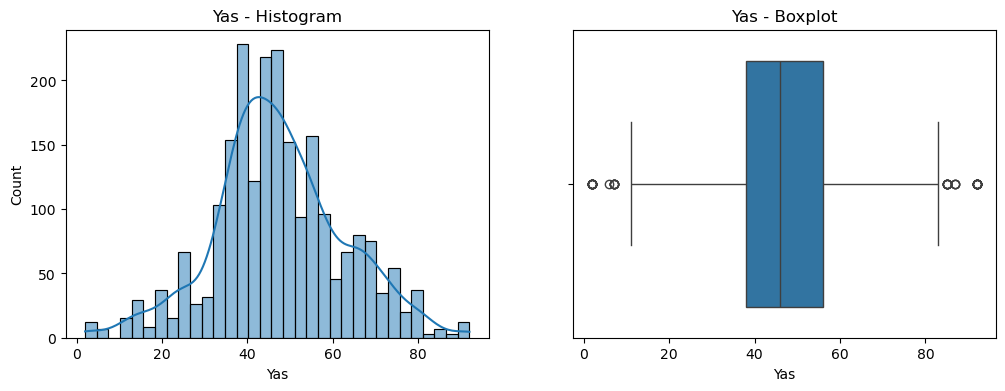

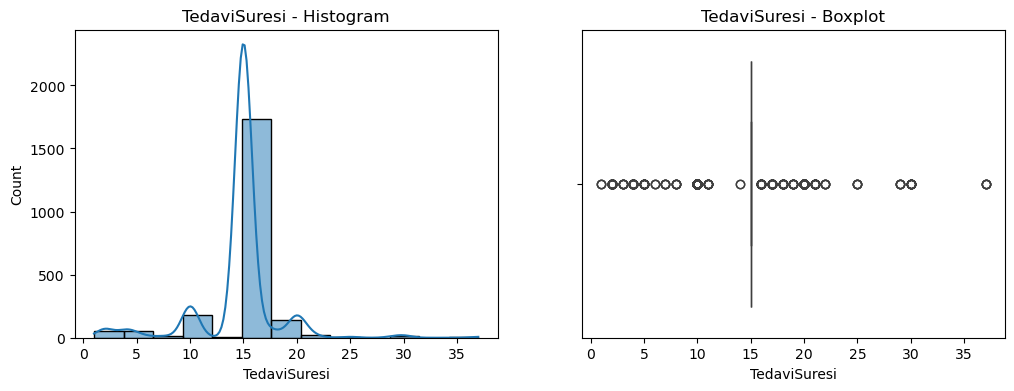

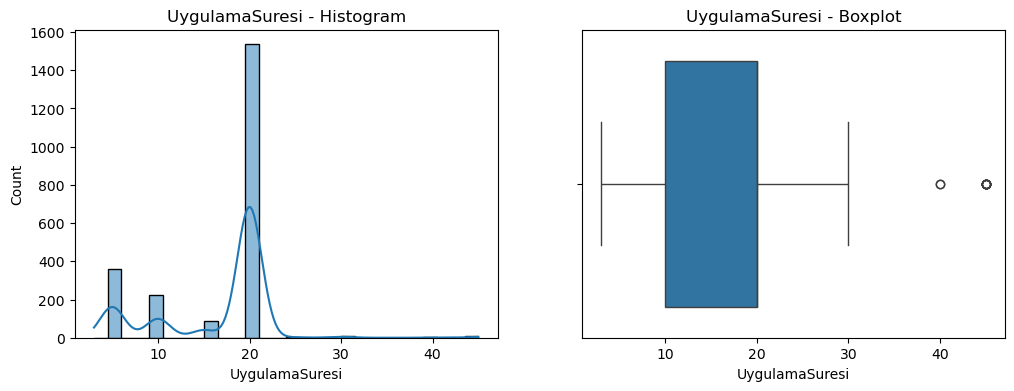

In [91]:
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()
               

## 6. Kategorik Değişken Analizi

In [109]:
def categorical_frequency(df, col):
    counts = df[col].value_counts(dropna=False)  
    percents = df[col].value_counts(normalize=True, dropna=False) * 100 
    summary = pd.DataFrame({
        "Frekans": counts,
        "Yüzde (%)": percents.round(2)
    })
    return summary


for col in categorical_cols:
    display(categorical_frequency(df, col).head(20))


,Frekans,Yüzde (%)
Cinsiyet,,
Kadın,1274,57.00
Erkek,792,35.44
NaN,169,7.56


,Frekans,Yüzde (%)
KanGrubu,,
NaN,675,30.20
0 Rh+,579,25.91
A Rh+,540,24.16
B Rh+,206,9.22
AB Rh+,80,3.58
B Rh-,68,3.04
A Rh-,53,2.37
0 Rh-,26,1.16
AB Rh-,8,0.36


,Frekans,Yüzde (%)
Uyruk,,
Türkiye,2173,97.23
Tokelau,27,1.21
Arnavutluk,13,0.58
Azerbaycan,12,0.54
Libya,10,0.45


,Frekans,Yüzde (%)
Bolum,,
"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045,91.50
Ortopedi Ve Travmatoloji,88,3.94
İç Hastalıkları,32,1.43
Nöroloji,17,0.76
Kardiyoloji,11,0.49
NaN,11,0.49
Göğüs Hastalıkları,8,0.36
Laboratuar,7,0.31
Genel Cerrahi,6,0.27


,Frekans,Yüzde (%)
UygulamaYerleri,,
Bel,528,23.62
Boyun,363,16.24
NaN,221,9.89
Diz,177,7.92
Sol Omuz Bölgesi,137,6.13
Sağ Omuz Bölgesi,127,5.68
Sol El Bilek Bölgesi,83,3.71
Sırt,75,3.36
Sağ Ayak Bileği Bölgesi,61,2.73


In [108]:
UygulamaYerleri_split = df["UygulamaYerleri"].dropna().str.split(",").explode().str.strip()
UygulamaYerleri_counts = UygulamaYerleri_split.value_counts()
UygulamaYerleri_percent = (uyg_counts / len(UygulamaYerleri_split) * 100).round(2)

pd.DataFrame({"Frekans": UygulamaYerleri_counts, "Yüzde (%)": UygulamaYerleri_percent}).head(20)


,Frekans,Yüzde (%)
UygulamaYerleri,,
Bel,543,26.01
Boyun,388,18.58
Diz,177,8.48
Sol Omuz Bölgesi,140,6.70
Sağ Omuz Bölgesi,132,6.32
Sırt,96,4.60
Sol El Bilek Bölgesi,86,4.12
Sağ Ayak Bileği Bölgesi,68,3.26
Sol Ayak Bileği Bölgesi,65,3.11


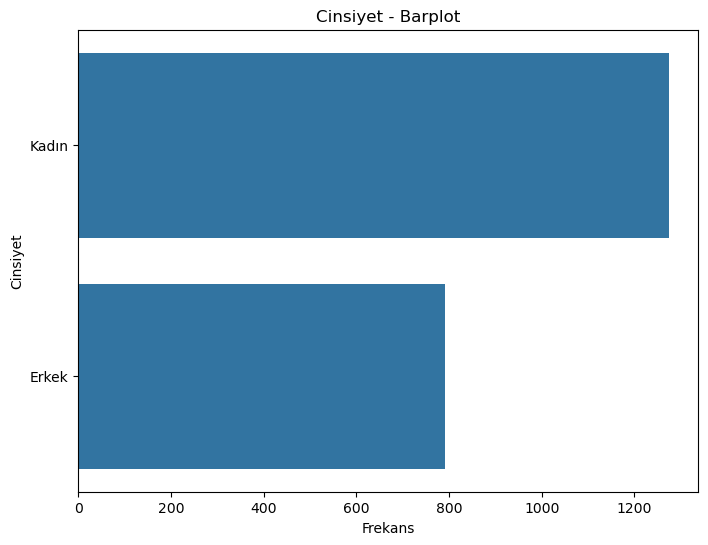

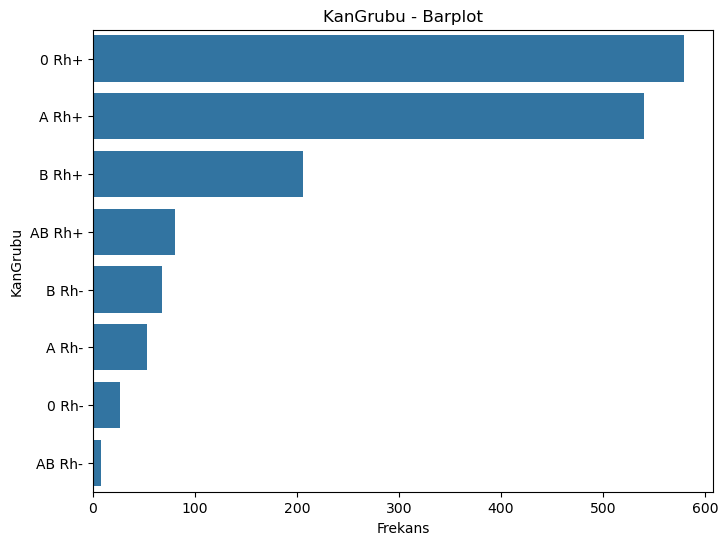

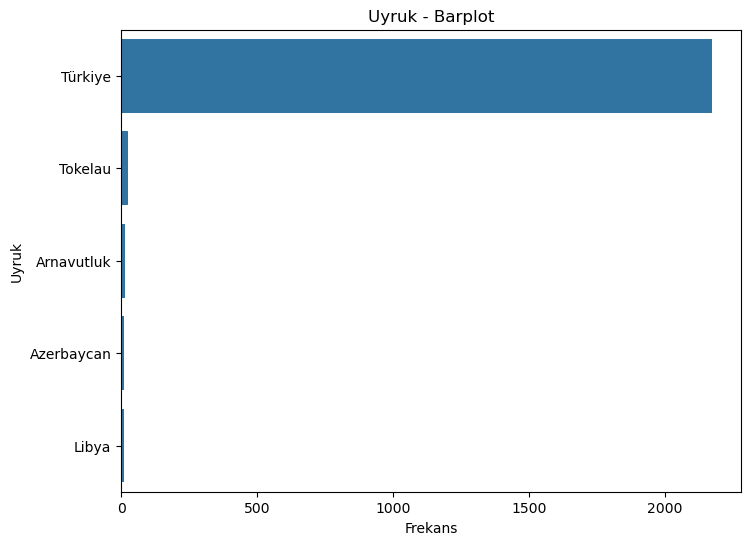

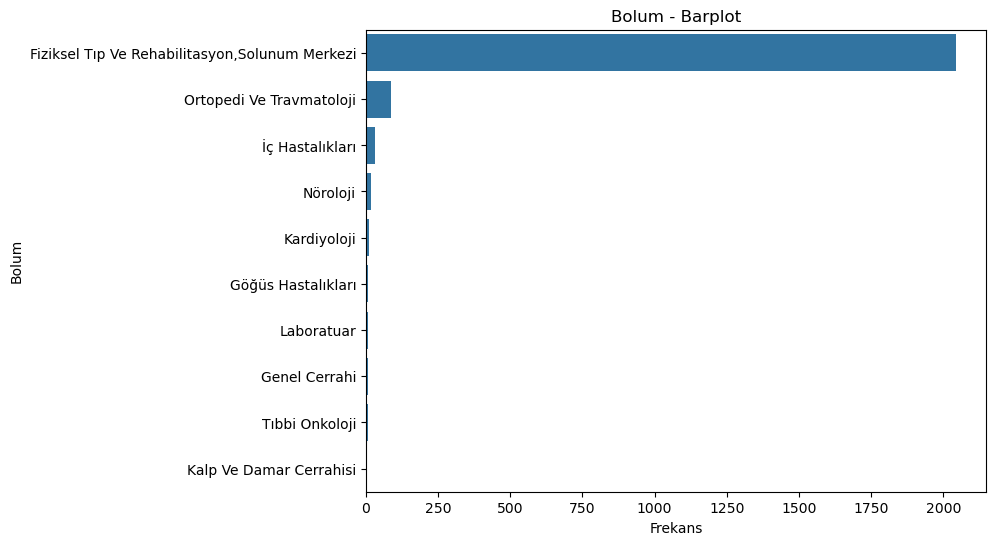

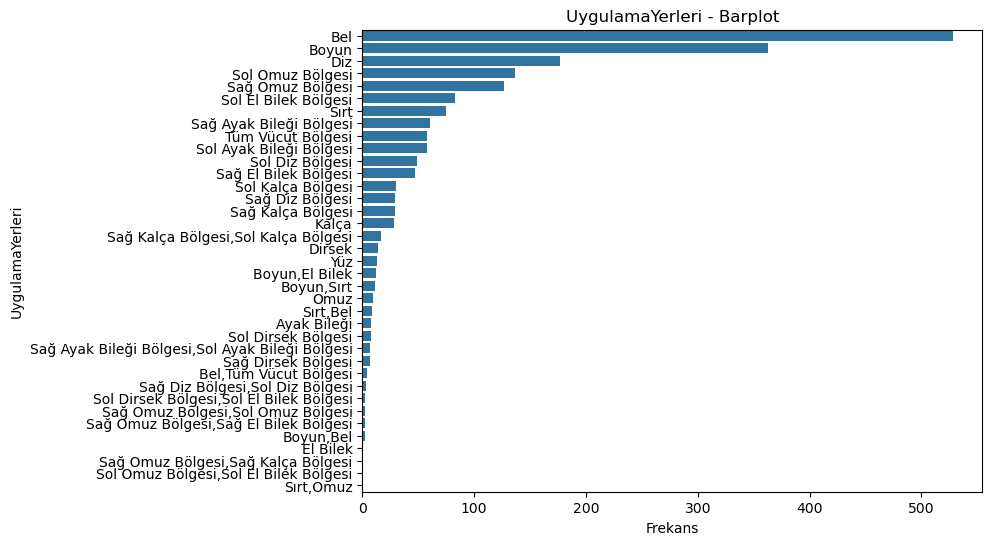

In [118]:
categorical_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "UygulamaYerleri"]

for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"{col} - Barplot")
    plt.xlabel("Frekans")
    plt.show()


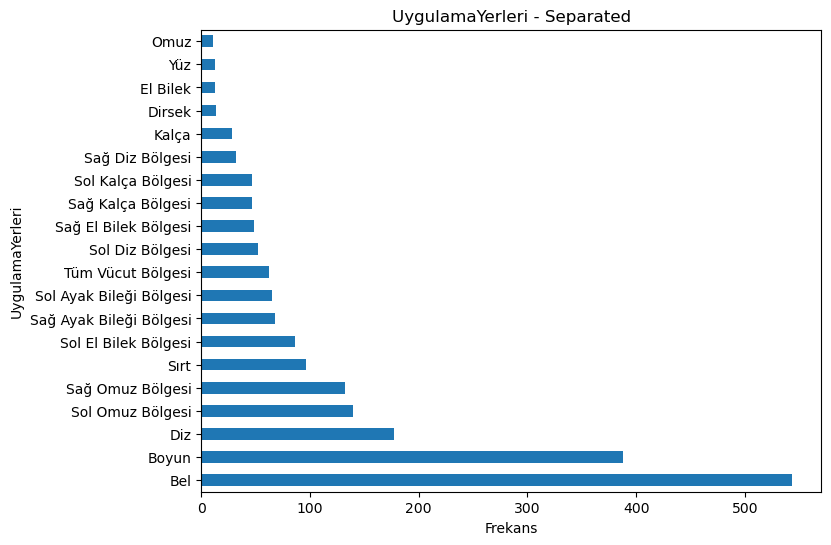

In [119]:
UygulamaYerleri_counts.head(20).plot(kind="barh", figsize=(8,6), title="UygulamaYerleri - Separated")
plt.xlabel("Frekans")   
plt.show()


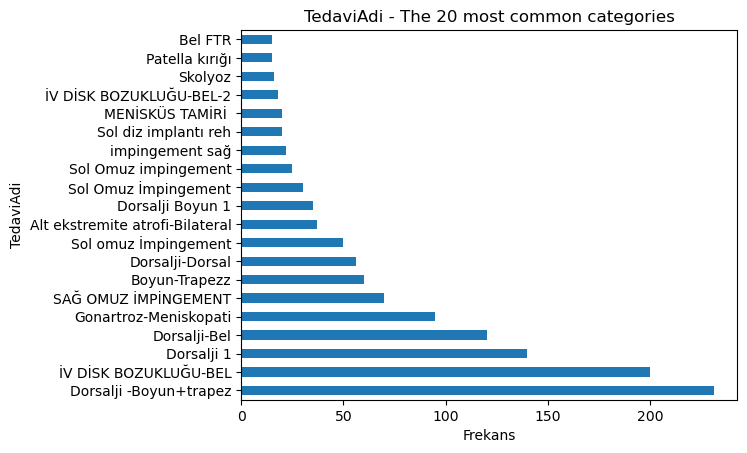

In [121]:
df["TedaviAdi"].value_counts().head(20).plot(kind="barh")
plt.title("TedaviAdi - The 20 most common categories")
plt.xlabel("Frekans")
plt.show()

In [124]:
TedaviAdi_counts = df["TedaviAdi"].value_counts()
TedaviAdi_percent = round((TedaviAdi_counts / len(df)) * 100, 2)

TedaviAdi_summary = pd.DataFrame({
    "Frekans": TedaviAdi_counts,
    "Yüzde (%)": TedaviAdi_percent
})

# İlk 20 tedavi
TedaviAdi_summary.head(40)


,Frekans,Yüzde (%)
TedaviAdi,,
Dorsalji -Boyun+trapez,231,10.34
İV DİSK BOZUKLUĞU-BEL,200,8.95
Dorsalji 1,140,6.26
Dorsalji-Bel,120,5.37
Gonartroz-Meniskopati,95,4.25
SAĞ OMUZ İMPİNGEMENT,70,3.13
Boyun-Trapezz,60,2.68
Dorsalji-Dorsal,56,2.51
Sol omuz İmpingement,50,2.24


## 7. Multi-label Değişken Analizi

In [139]:
multi_label_cols = ["KronikHastalik", "Alerji", "Tanilar"]

def kategori_frekans(df, col):
    values = []
    for row in df[col].dropna():
        for item in row.split(","):
            values.append(item.strip().lower())
    series = pd.Series(values)
    
    frekans = series.value_counts()
    yuzde = (frekans / len(df)) * 100
    
    return pd.DataFrame({"Frekans": frekans, "Yüzde (%)": yuzde.round(2)})

for col in multi_label_cols:
    frekans_df = kategori_frekans(df, col)
    print(f"Kategori Sayisi ({col}): {frekans_df.shape[0]}")
    display(frekans_df.head(10))


Kategori Sayisi (KronikHastalik): 15


,Frekans,Yüzde (%)
aritmi,395,17.67
hiportiroidizm,383,17.14
limb-girdle musküler distrofi,379,16.96
astım,351,15.70
hipertiroidizm,327,14.63
myastenia gravis,316,14.14
diyabet,308,13.78
duchenne musküler distrofisi,307,13.74
fascioscapulohumeral distrofi,304,13.60
kalp yetmezliği,301,13.47


Kategori Sayisi (Alerji): 11


,Frekans,Yüzde (%)
polen,500,22.37
toz,259,11.59
novalgin,182,8.14
sucuk,174,7.79
arveles,102,4.56
coraspin,102,4.56
voltaren,86,3.85
yer fıstığı,83,3.71
gri̇pi̇n,55,2.46
volteren,35,1.57


Kategori Sayisi (Tanilar): 285


,Frekans,Yüzde (%)
dorsalji̇,695,31.10
di̇ğer,677,30.29
tanımlanmamış,408,18.26
omuzun darbe sendromu,273,12.21
i̇ntervertebral disk bozuklukları,270,12.08
lumbosakral bölge,266,11.90
servi̇kotorasi̇k bölge,211,9.44
servi̇kal bölge,148,6.62
eklem ağrısı,113,5.06
dorsalji,105,4.70


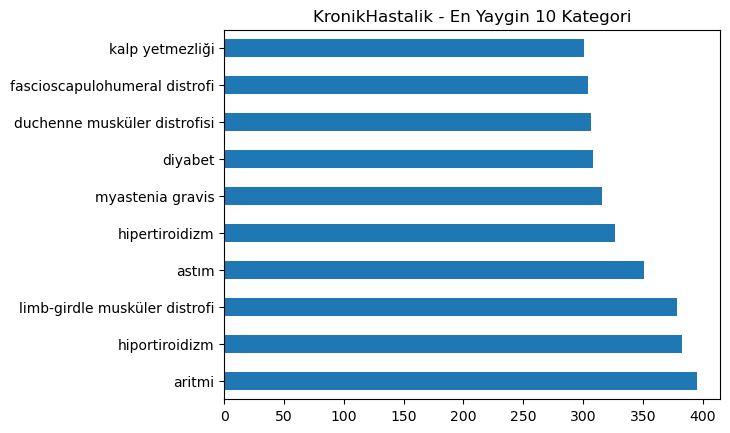

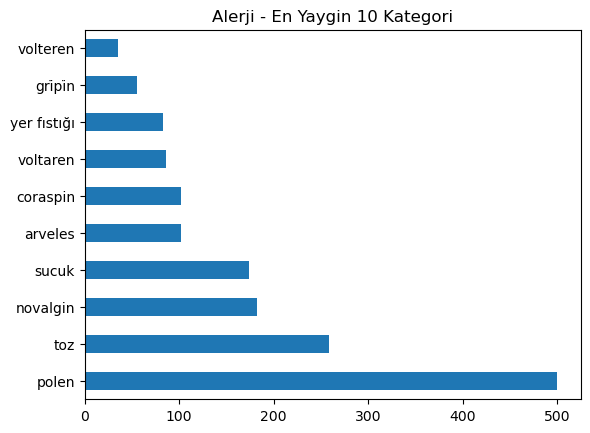

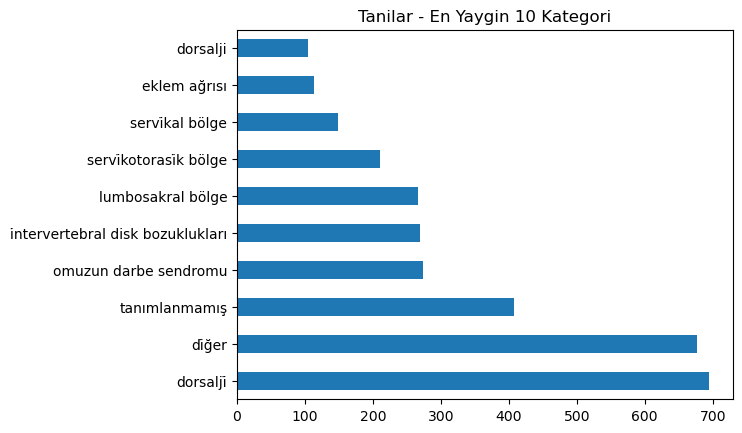

In [133]:
for col in multi_label_cols:
    values = []
    for row in df[col].dropna():
        for item in row.split(","):
            values.append(item.strip().lower())
    
    pd.Series(values).value_counts().head(10).plot(kind="barh")
    plt.title(f"{col} - En Yaygin 10 Kategori")
    plt.show()


## 8. Ikili Degisken Analizi

### 8.1. Sayısal – Sayısal Analiz

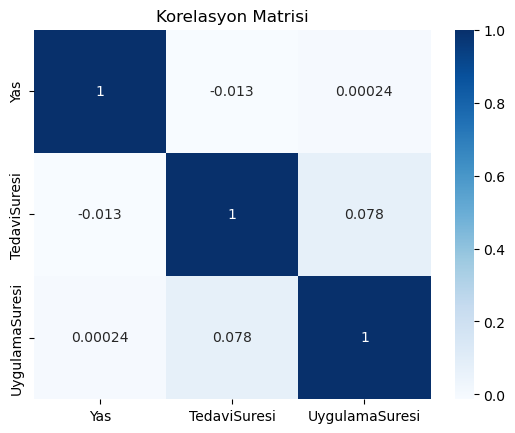

In [140]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Korelasyon Matrisi")
plt.show()

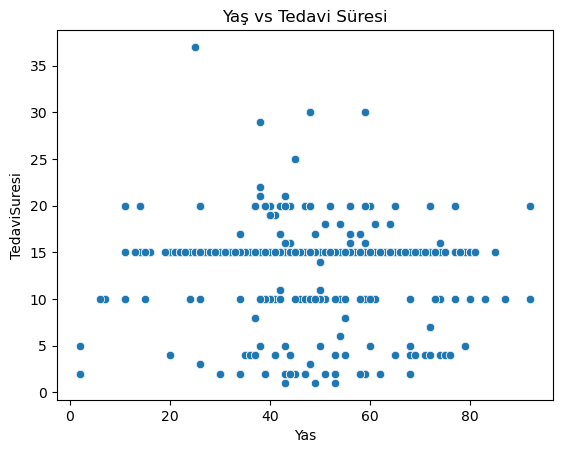

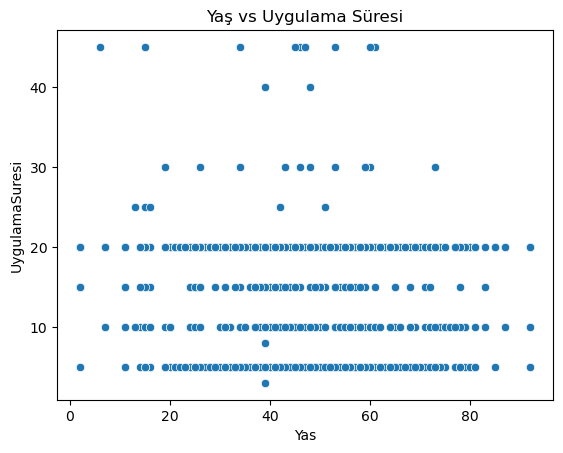

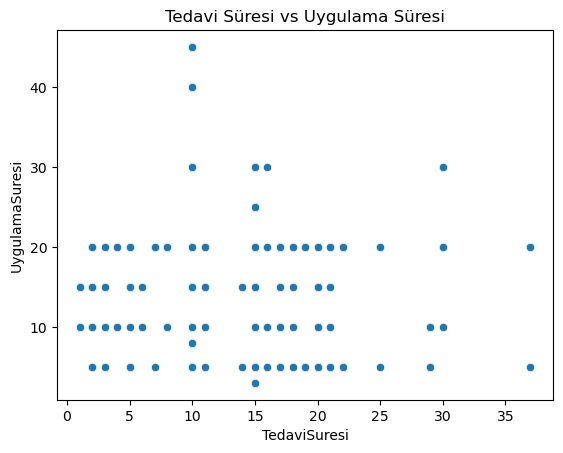

In [144]:
sns.scatterplot(x="Yas", y="TedaviSuresi", data=df)
plt.title("Yaş vs Tedavi Süresi")
plt.show()

sns.scatterplot(x="Yas", y="UygulamaSuresi", data=df)
plt.title("Yaş vs Uygulama Süresi")
plt.show()

sns.scatterplot(x="TedaviSuresi", y="UygulamaSuresi", data=df)
plt.title("Tedavi Süresi vs Uygulama Süresi")
plt.show()


### 8.2. Sayisal - Kategorik Analiz

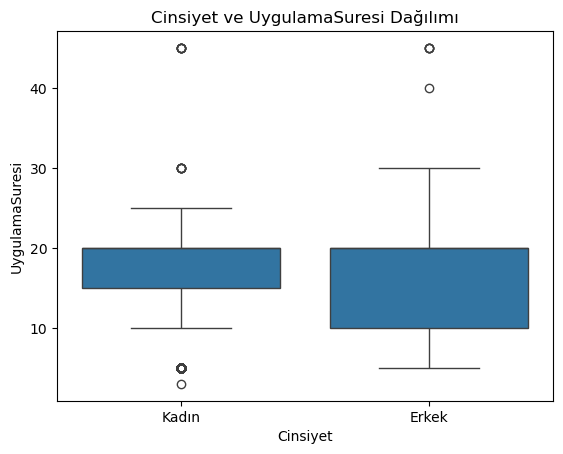

In [68]:
sns.boxplot(x="Cinsiyet", y="UygulamaSuresi", data=df)
plt.title("Cinsiyet ve UygulamaSuresi Dağılımı")
plt.show()


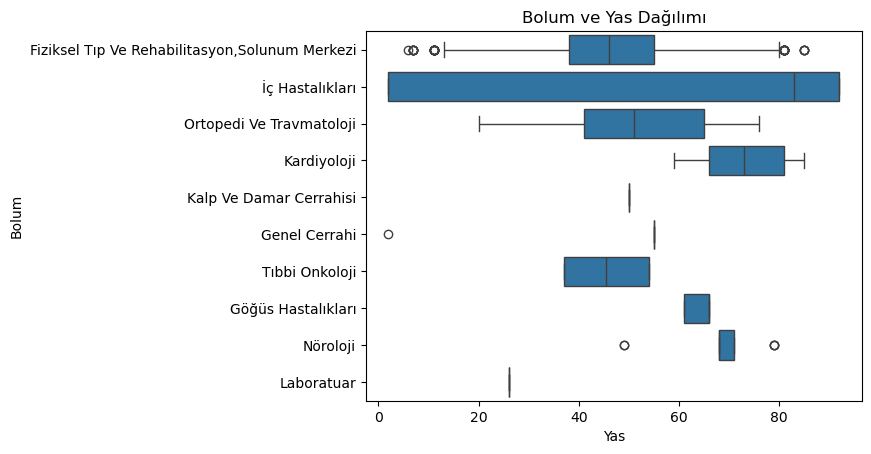

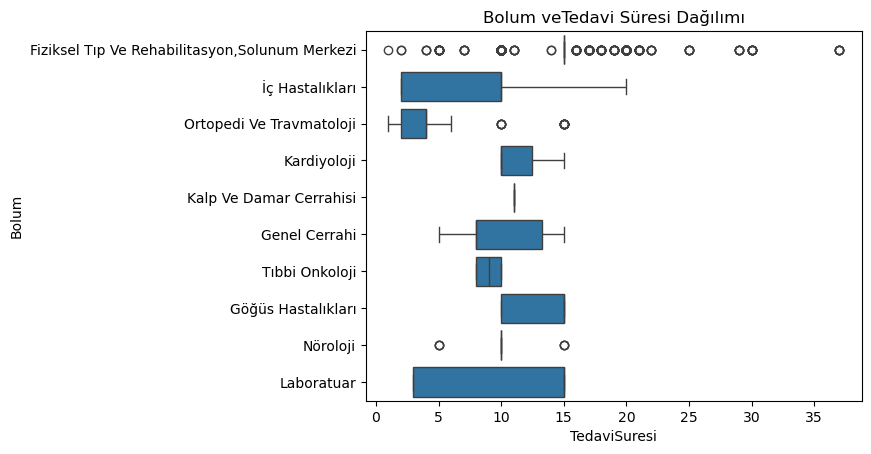

In [149]:
sns.boxplot(x="Yas", y="Bolum", data=df)
plt.title("Bolum ve Yas Dağılımı")
plt.show()

sns.boxplot(x="TedaviSuresi", y="Bolum", data=df)
plt.title("Bolum veTedavi Süresi Dağılımı")
plt.show()

### 8.3. Kategorik - Kategorik Analiz

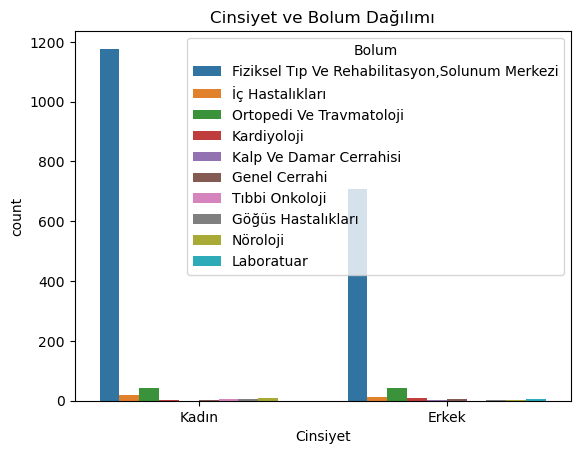

Bolum,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Genel Cerrahi,Göğüs Hastalıkları,Kalp Ve Damar Cerrahisi,Kardiyoloji,Laboratuar,Nöroloji,Ortopedi Ve Travmatoloji,Tıbbi Onkoloji,İç Hastalıkları
Cinsiyet,,,,,,,,,,
Erkek,707,5,3,4,9,7,2,42,0,13
Kadın,1177,1,5,0,2,0,9,44,6,19


In [70]:
sns.countplot(x="Cinsiyet", hue="Bolum", data=df)
plt.title("Cinsiyet ve Bolum Dağılımı")
plt.show()

pd.crosstab(df["Cinsiyet"], df["Bolum"])




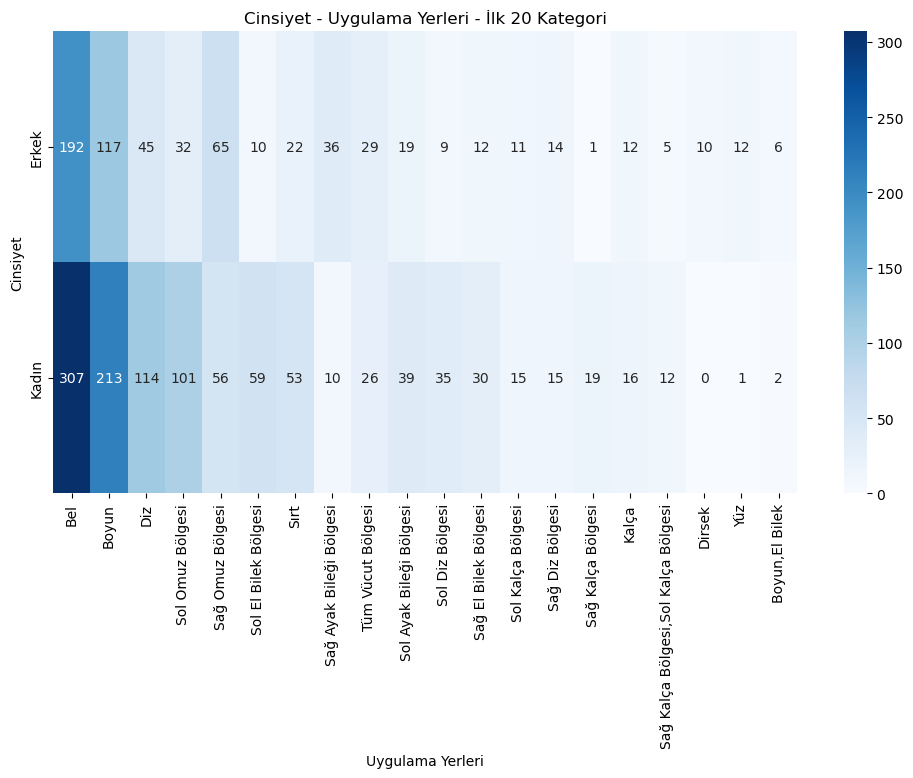

In [151]:
crosstab = pd.crosstab(df["Cinsiyet"], df["UygulamaYerleri"])

top_categories = df["UygulamaYerleri"].value_counts().head(20).index
crosstab_categories = crosstab[top_categories]
plt.figure(figsize=(12,6))
sns.heatmap(crosstab_categories, annot=True, fmt="d", cmap="Blues")
plt.title("Cinsiyet - Uygulama Yerleri - İlk 20 Kategori")
plt.xlabel("Uygulama Yerleri")
plt.ylabel("Cinsiyet")
plt.show()


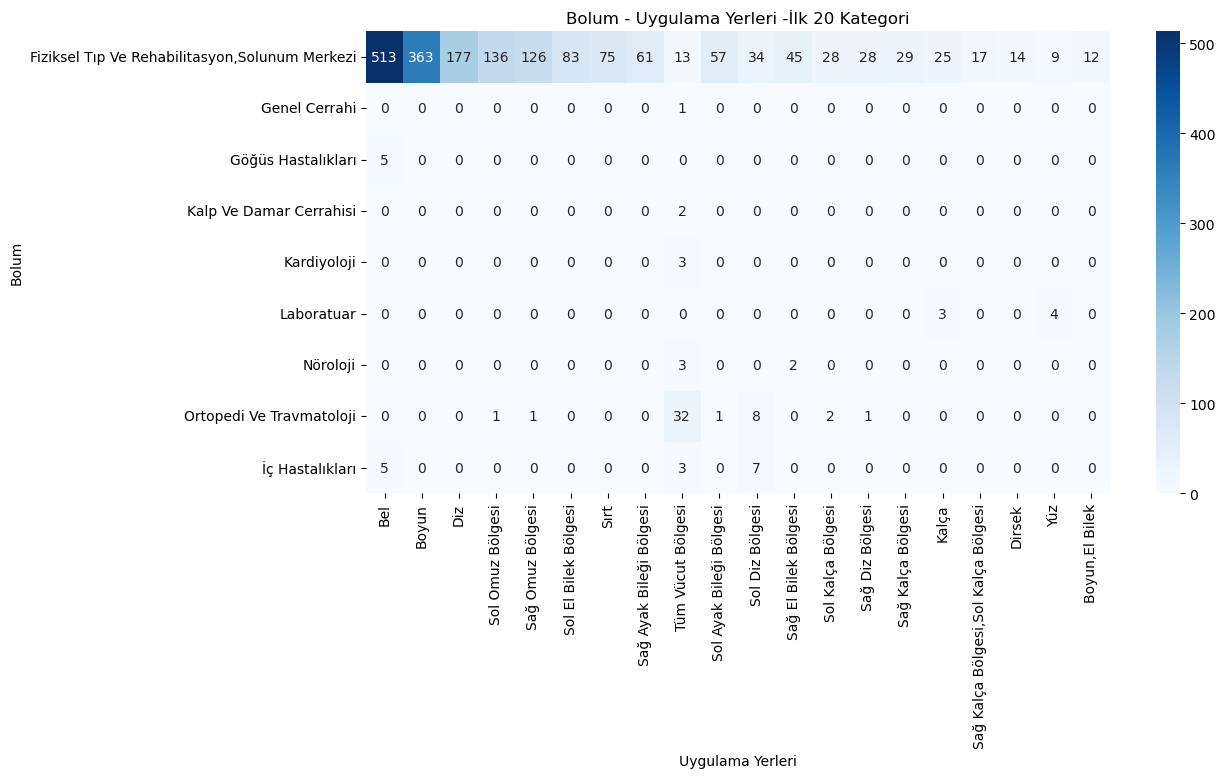

In [153]:
crosstab = pd.crosstab(df["Bolum"], df["UygulamaYerleri"])
top_categories = df["UygulamaYerleri"].value_counts().head(20).index
crosstab_categories = crosstab[top_categories]

plt.figure(figsize=(12,6))
sns.heatmap(crosstab_categories, annot=True, fmt="d", cmap="Blues")
plt.title("Bolum - Uygulama Yerleri -İlk 20 Kategori")
plt.xlabel("Uygulama Yerleri")
plt.ylabel("Bolum")
plt.show()